In [10]:
import os
import sys
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [11]:
#img = cv.imread('../data/template_matching/search4.png', 0)
img = cv.imread('/home/zoltan/Downloads/search6.png', 0)

In [12]:
#template = cv.imread('../data/template_matching/template4.png', 0)
template = cv.imread('/home/zoltan/Downloads/template6.png', 0)
w, h = template.shape[::-1]   

# crop image
#new_size = 23
#padding = int((w - new_size)/2.0)
#template = template[padding:-padding, padding:-padding]

Visualize template and search image:

Text(0.5, 1.0, 'Search image')

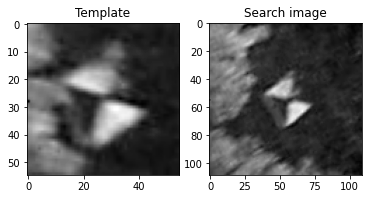

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(template, cmap='gray')
ax1.set_title('Template')

ax2.imshow(img, cmap='gray')
ax2.set_title('Search image')

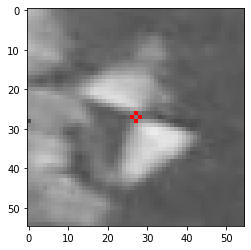

In [14]:
w, h = template.shape[::-1]   
template_viz = cv.cvtColor(template,cv.COLOR_GRAY2RGB)
cv.circle(template_viz,(int(w/2), int(h/2)), 1, (255,0,0), 1)
plt.imshow(template_viz, cmap='gray')

In [15]:
method = cv.TM_SQDIFF_NORMED # TM_SQDIFF, TM_SQDIFF_NORMED, TM_CCORR, TM_CCORR_NORMED, TM_CCOEFF, TM_CCOEFF_NORMED
res = cv.matchTemplate(img, template, method)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

In [18]:
if method in [cv.TM_SQDIFF_NORMED, cv.TM_SQDIFF_NORMED]:
    top_left = np.array(min_loc)
    print(min_val)
else:
    top_left = np.array(max_loc)
    print(max_val)
    
w, h = template.shape[::-1]    
bottom_right = (top_left[0] + w, top_left[1] + h)
center = (top_left + bottom_right) / 2.0
print('Center coordinates: ', center)

0.05872781202197075
Center coordinates:  [57.5 55.5]


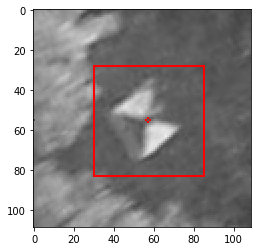

In [17]:
img_viz = cv.cvtColor(img,cv.COLOR_GRAY2RGB)
cv.rectangle(img_viz, top_left, bottom_right, (255,0,0), 1)
cv.circle(img_viz,(int(center[0]), int(center[1])), 1, (255,0,0), 1)
#cv.circle(img_viz,(int(center[0]+1), int(center[1]+1)), 1, (255,0,0), 1)
#cv.circle(img_viz,(int(center[0]+1), int(center[1])), 1, (255,0,0), 1)
#cv.circle(img_viz,(int(center[0]), int(center[1])+1), 1, (255,0,0), 1)

plt.imshow(img_viz)